# Twitter Sentiment Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [2]:
# Load the data
tweets_df=pd.read_csv("twitter.csv")

In [3]:
tweets_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 624.3+ KB


In [5]:
tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [6]:
tweets_df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [7]:
tweets_df['tweet'][1200]

'you can tell a lot about an organization by the type of people they promote. #leadership  leadershipfreak #quote #inspirational  '

# Dropping First ID column

In [8]:
tweets_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [3]:
tweets_df=tweets_df.drop(['id'],axis=1)

In [4]:
tweets_df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


#  Explore Dataset

<AxesSubplot:>

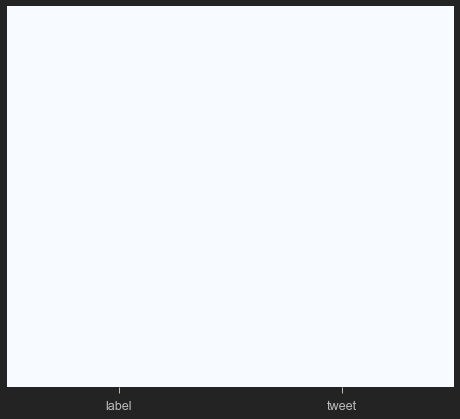

In [11]:
 sns.heatmap(tweets_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

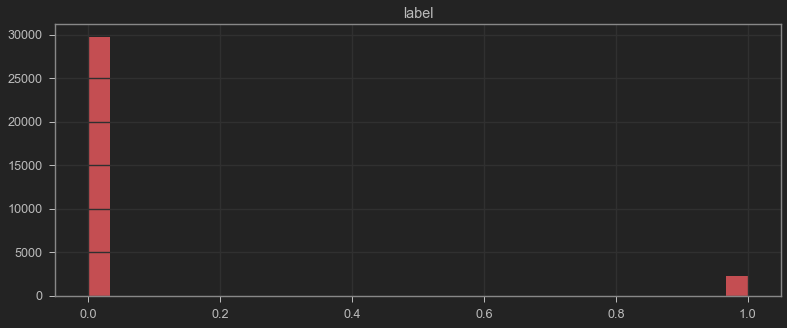

In [12]:
tweets_df.hist(bins = 30, figsize = (13,5), color = 'r')

<AxesSubplot:xlabel='label', ylabel='count'>

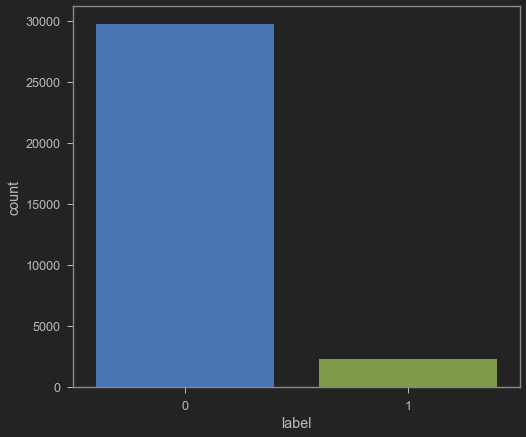

In [13]:
sns.countplot(x='label',data=tweets_df)

In [14]:
tweets_df['length']=tweets_df['tweet'].apply(len)
#get length of the tweet

In [15]:
tweets_df

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


<AxesSubplot:ylabel='Frequency'>

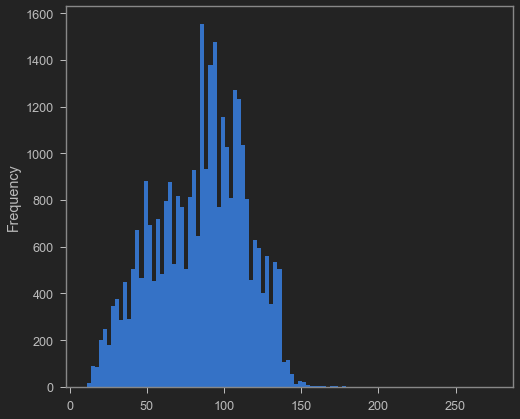

In [16]:
tweets_df['length'].plot(bins=100, kind='hist') 

In [17]:
tweets_df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [18]:
# Let's see the shortest message 
tweets_df[tweets_df['length'] == 11]['tweet'].iloc[0]

'i love you '

In [19]:
tweets_df[tweets_df['length']==84]['tweet']

43       my mom shares the same bihday as @user   bihda...
220      g o a l s ð repost from @user #propey #ocea...
640      oscar tabarez talks luis suarezâs angry reac...
723       @user another hands &amp; feet complete!! ber...
742      because great things never came from comfo zon...
                               ...                        
31445    .@user on making choices to keep herself   as ...
31448    i'm a gordo. #passpo #florence #firenze #italy...
31509    just 3 keys that are found on your computer to...
31857    traveling happy #family   holidays #car #sunny...
31883    we spent #familytime by doing simple wefie, we...
Name: tweet, Length: 333, dtype: object

In [20]:
positive = tweets_df[tweets_df['label']==0]
positive

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [21]:
negative = tweets_df[tweets_df['label']==1]
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


# Plotting The Wordcloud

In [22]:
sentences=tweets_df['tweet'].tolist()
sentences

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation',
 '[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  ',
 ' @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦',
 "the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl",
 'we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦ ',
 " @user @user welcome here !  i'm   it's so #gr8 ! ",
 ' â\x86\x9d #ireland consume

In [23]:
sentences_as_one_string="".join(sentences)
sentences_as_one_string

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run@user @user thanks for #lyft credit i can\'t use cause they don\'t offer wheelchair vans in pdx.    #disapointed #getthanked  bihday your majesty#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦   factsguide: society now    #motivation[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo   @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦the next school year is the year for exams.ð\x9f\x98¯ can\'t think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girlwe won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦  @user @user welcome here !  i\'m   it\'s so #gr8 !  â\x86\x9d #ireland consumer price index (mom) climbed from previous 0.2%

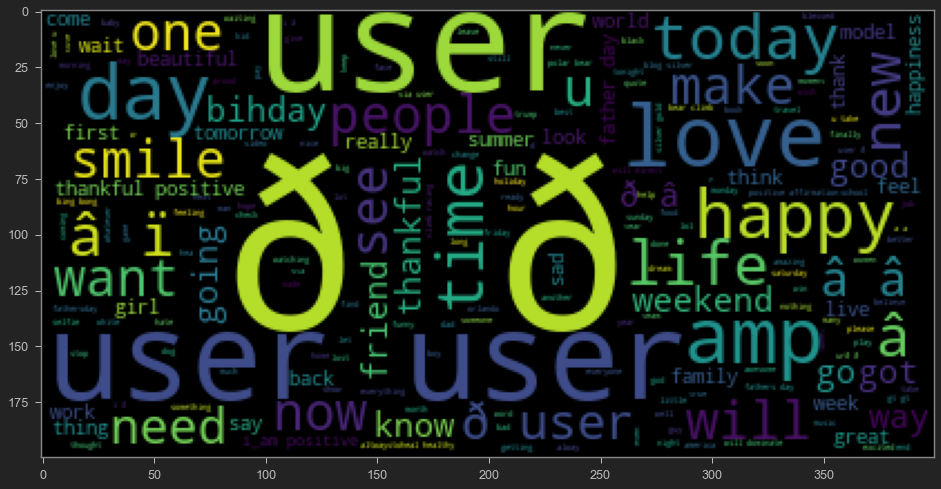

In [24]:
from wordcloud import WordCloud

plt.figure(figsize=(16,12))
plt.imshow(WordCloud().generate(sentences_as_one_string))

# Negative Wordcloud Plotting

In [25]:
# negative_sentences=tweets_df[tweets_df['label']==1]['tweet'].tolist()
negative_sentences=negative['tweet'].tolist()
negative_sentences_as_one_string=" ".join(negative_sentences)

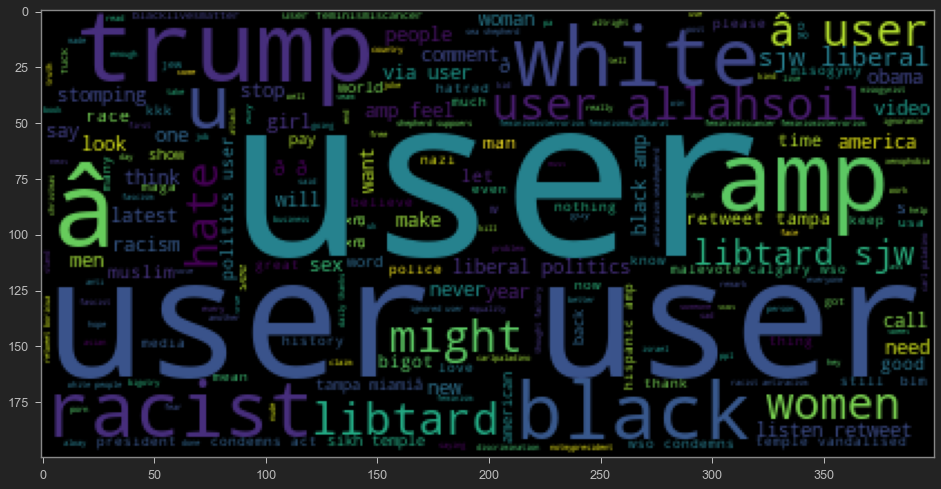

In [26]:
plt.figure(figsize=(16,12))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

# CREATE A PIPELINE TO REMOVE PUNCTUATIONS, STOPWORDS AND PERFORM COUNT VECTORIZATION

In [27]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
import nltk # Natural Language tool kit 

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\suraj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

# TAKING 1000 DATA ONLY FROM 31962 DATA FOR MY SLOW PC

In [31]:
tweets_data=tweets_df[0:1000]
tweets_data

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
995,0,are you really or just pretending to be? #t...,107
996,0,i finally found a way how to delete old tweets...,98
997,0,@user what a #view #oregon #poland #usa #un...,92
998,0,"have you put in your #vote yet? if you havent,...",110


In [32]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning,dtype = np.uint8)
tweets_countvectorizer = vectorizer.fit_transform(tweets_data['tweet'])

In [33]:
# print(vectorizer.get_feature_names())

In [34]:
print(tweets_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [35]:
tweets_countvectorizer.shape

(1000, 4131)

In [36]:
tweets = pd.DataFrame(tweets_countvectorizer.toarray())


In [37]:
X = tweets


In [38]:
X

,0,1,2,3,4,5,6,7,8,9,...,4121,4122,4123,4124,4125,4126,4127,4128,4129,4130
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
y = tweets_df[:1000]['label']
y

0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: label, Length: 1000, dtype: int64

# TRAIN A NAIVE BAYES CLASSIFIER MODEL


In [40]:
X.shape

(1000, 4131)

In [41]:
y.shape

(1000,)

# Train Test Splitting

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [43]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

# from sklearn.linear_model import LogisticRegression
# clf=LogisticRegression(random_state=0).fit(X_train, y_train)

MultinomialNB()

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

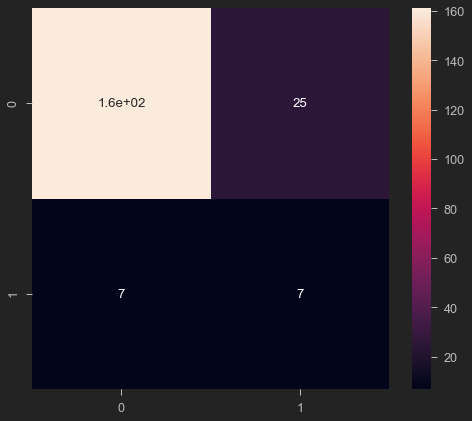

In [45]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [46]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       186
           1       0.22      0.50      0.30        14

    accuracy                           0.84       200
   macro avg       0.59      0.68      0.61       200
weighted avg       0.91      0.84      0.87       200



# Try Training Using Logistic Regression 

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(random_state=0).fit(X_train, y_train)

<AxesSubplot:>

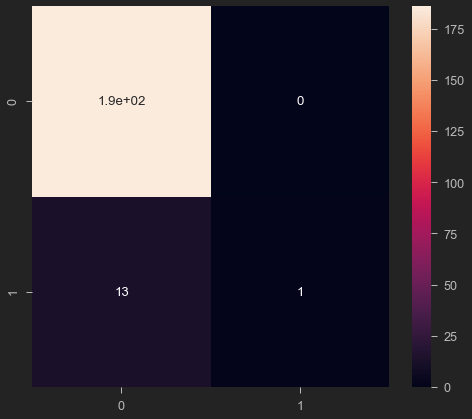

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
# Predicting the Test set results
y_predict_test = clf.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [49]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       186
           1       1.00      0.07      0.13        14

    accuracy                           0.94       200
   macro avg       0.97      0.54      0.55       200
weighted avg       0.94      0.94      0.91       200

